In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('dataset.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(8, 2)


,X,Y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30


In [4]:
f1 = data['X'].values
f2 = data['Y'].values
X = np.array(list(zip(f1, f2)))

In [5]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [6]:
k = 2
C_x = np.array([0.1, 0.3])
C_y = np.array([0.6, 0.2])
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[0.1 0.6]
 [0.3 0.2]]


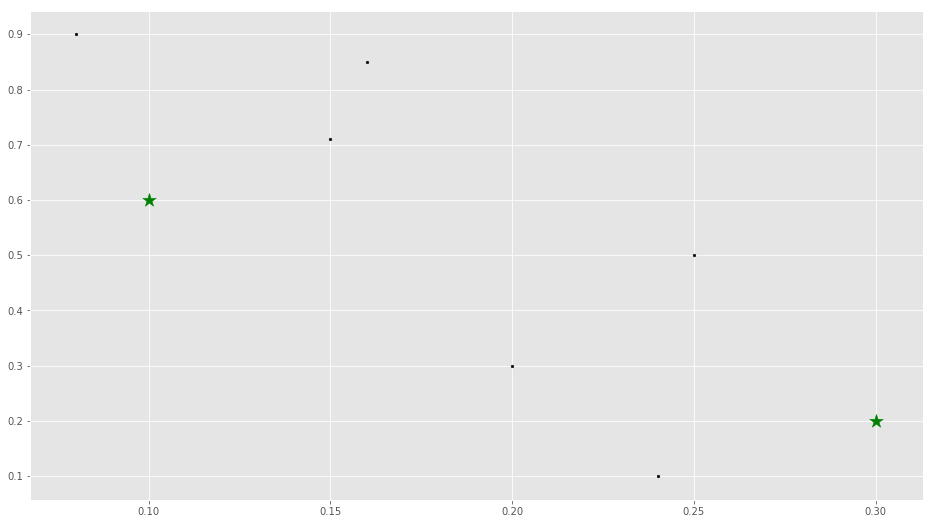

In [7]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [8]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
error = dist(C, C_old, None)

while error != 0:
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    C_old = deepcopy(C)

    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

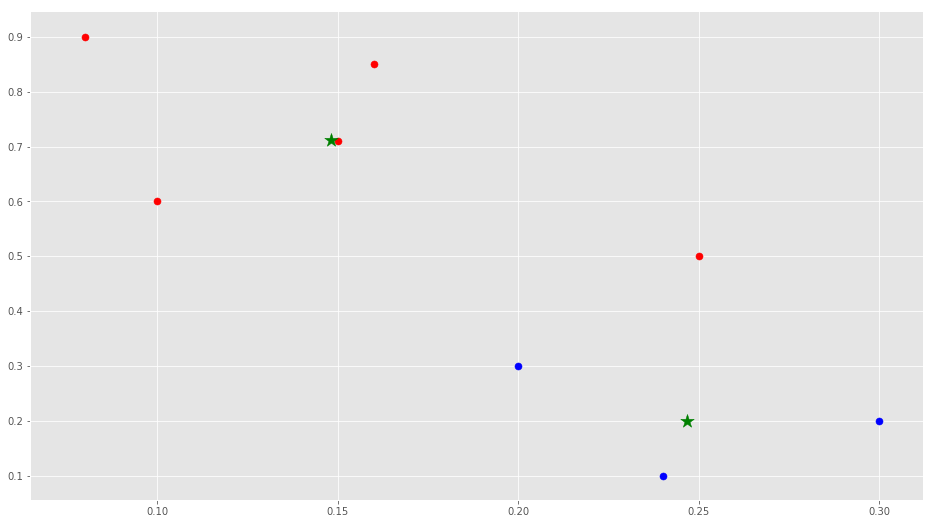

In [9]:
colors = ['r', 'b']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=50, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='g')
plt.show()